b'Skipping line 5: expected 9 fields, saw 13\nSkipping line 6: expected 9 fields, saw 10\nSkipping line 7: expected 9 fields, saw 12\nSkipping line 9: expected 9 fields, saw 13\nSkipping line 11: expected 9 fields, saw 10\nSkipping line 12: expected 9 fields, saw 12\nSkipping line 13: expected 9 fields, saw 11\nSkipping line 14: expected 9 fields, saw 12\nSkipping line 15: expected 9 fields, saw 11\nSkipping line 16: expected 9 fields, saw 10\nSkipping line 17: expected 9 fields, saw 15\nSkipping line 18: expected 9 fields, saw 10\nSkipping line 23: expected 9 fields, saw 12\nSkipping line 24: expected 9 fields, saw 10\nSkipping line 25: expected 9 fields, saw 12\nSkipping line 27: expected 9 fields, saw 11\nSkipping line 29: expected 9 fields, saw 10\nSkipping line 30: expected 9 fields, saw 12\nSkipping line 31: expected 9 fields, saw 11\nSkipping line 32: expected 9 fields, saw 13\nSkipping line 33: expected 9 fields, saw 13\nSkipping line 34: expected 9 fields, saw 11\nSkipping lin

       Unnamed: 0  Count_language
count   26.000000       26.000000
mean    12.500000       74.307692
std      7.648529      344.100075
min      0.000000        1.000000
25%      6.250000        1.250000
50%     12.500000        4.000000
75%     18.750000        9.000000
max     25.000000     1761.000000


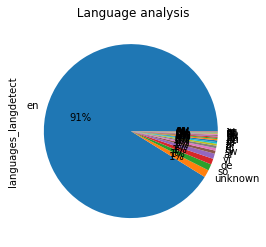

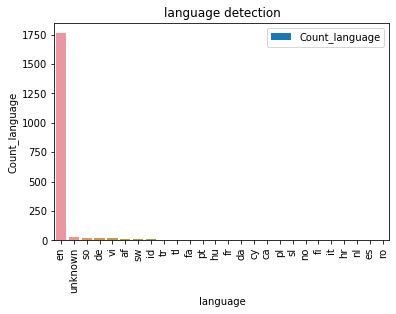

In [4]:
import numpy as np 
import pandas as pd
import spacy
from spacy_cld import LanguageDetector
import matplotlib.pyplot as plt
import langdetect
import langid
import os
import seaborn as sns

df = pd.read_csv('C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\trumptweets.csv',error_bad_lines=False,quoting=3)
data = df['content']




languages_langdetect = []

for line in data:
    try:
        result = langdetect.detect_langs(line)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    
    finally:
        languages_langdetect.append(result)
        
        
df['languages_langdetect'] = languages_langdetect
res_all=df['languages_langdetect'].value_counts()
res_all.plot(kind="pie",autopct='%1.0f%%')
plt.title(" Language analysis")
rf=pd.DataFrame({'language':res_all.index, 'Count_language':res_all.values})
res=rf.to_excel("C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\res_f.xlsx")
data_f=pd.read_excel("C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\res_f.xlsx")
print(data_f.describe())
data_f.plot(kind="bar",x="language",y="Count_language")
plt.title("language detection")
sns.barplot(x="language",y="Count_language",data=data_f)

b'Skipping line 5: expected 9 fields, saw 13\nSkipping line 6: expected 9 fields, saw 10\nSkipping line 7: expected 9 fields, saw 12\nSkipping line 9: expected 9 fields, saw 13\nSkipping line 11: expected 9 fields, saw 10\nSkipping line 12: expected 9 fields, saw 12\nSkipping line 13: expected 9 fields, saw 11\nSkipping line 14: expected 9 fields, saw 12\nSkipping line 15: expected 9 fields, saw 11\nSkipping line 16: expected 9 fields, saw 10\nSkipping line 17: expected 9 fields, saw 15\nSkipping line 18: expected 9 fields, saw 10\nSkipping line 23: expected 9 fields, saw 12\nSkipping line 24: expected 9 fields, saw 10\nSkipping line 25: expected 9 fields, saw 12\nSkipping line 27: expected 9 fields, saw 11\nSkipping line 29: expected 9 fields, saw 10\nSkipping line 30: expected 9 fields, saw 12\nSkipping line 31: expected 9 fields, saw 11\nSkipping line 32: expected 9 fields, saw 13\nSkipping line 33: expected 9 fields, saw 13\nSkipping line 34: expected 9 fields, saw 11\nSkipping lin

"\nxaxis = []\nfor i in range(0,1932):\n    xaxis.append(i)\n\nylabel_new_1 = all_sent_values[:1932]\n\nxlabel = xaxis\nplt.figure(figsize=(9,9))\nplt.xlabel('ReviewIndex')\nplt.ylabel('SentimentValue(-1 to 1)')\nplt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)\n\nplt.title('Scatter Intensity Plot of Sentiments')\nplt.show()\n"

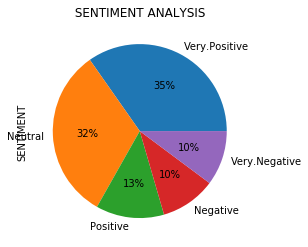

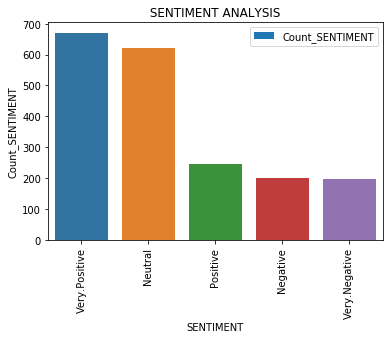

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import ast
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\trumptweets.csv',error_bad_lines=False,quoting=3)
data=shuffle(data)#random data
#data=data.dropna()#delete null rows


all_reviews = data['content']
all_sent_values = []
all_sentiments = []


def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)


"""
ss=data['content'][509]
print(ss)
print(" sentiment :")
print(sentiment_value(ss))
"""


for i in range(0,1932):
    all_sent_values.append(sentiment_value(all_reviews[i]))

SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,1932):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('Very.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('Very.Negative')
        SENTIMENT_VALUE.append(1)
        
        
data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
data['SENTIMENT'] = SENTIMENT


to_ser=data['SENTIMENT'].value_counts()
to_ser.plot(kind='pie',autopct='%1.0f%%')
plt.title(" SENTIMENT ANALYSIS ")

rf=pd.DataFrame({'SENTIMENT':to_ser.index, 'Count_SENTIMENT':to_ser.values})
res=rf.to_excel("C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\resultats_sen.xlsx")
data_f=pd.read_excel("C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\resultats_sen.xlsx")
data_f.plot(kind="bar",x='SENTIMENT',y="Count_SENTIMENT")
plt.title(" SENTIMENT ANALYSIS ")
sns.barplot(x='SENTIMENT', y='Count_SENTIMENT', data=data_f)




#data_f= pd.DataFrame(columns=['SENTIMENT','Count_SENTIMENT'])
#data_f.Count_SENTIMENT=pd.,to_numeric(data_f.Count_SENTIMENT)
#data_f.plot(x="SENTIMENT",y="Count_SENTIMENT")




#res = data.to_excel("C:\\Users\\rami.khalid\\Desktop\\sentiment.xlsx")




"""
xaxis = []
for i in range(0,1932):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:1932]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()
"""

Wall time: 0 ns


b'Skipping line 5: expected 9 fields, saw 13\nSkipping line 6: expected 9 fields, saw 10\nSkipping line 7: expected 9 fields, saw 12\nSkipping line 9: expected 9 fields, saw 13\nSkipping line 11: expected 9 fields, saw 10\nSkipping line 12: expected 9 fields, saw 12\nSkipping line 13: expected 9 fields, saw 11\nSkipping line 14: expected 9 fields, saw 12\nSkipping line 15: expected 9 fields, saw 11\nSkipping line 16: expected 9 fields, saw 10\nSkipping line 17: expected 9 fields, saw 15\nSkipping line 18: expected 9 fields, saw 10\nSkipping line 23: expected 9 fields, saw 12\nSkipping line 24: expected 9 fields, saw 10\nSkipping line 25: expected 9 fields, saw 12\nSkipping line 27: expected 9 fields, saw 11\nSkipping line 29: expected 9 fields, saw 10\nSkipping line 30: expected 9 fields, saw 12\nSkipping line 31: expected 9 fields, saw 11\nSkipping line 32: expected 9 fields, saw 13\nSkipping line 33: expected 9 fields, saw 13\nSkipping line 34: expected 9 fields, saw 11\nSkipping lin

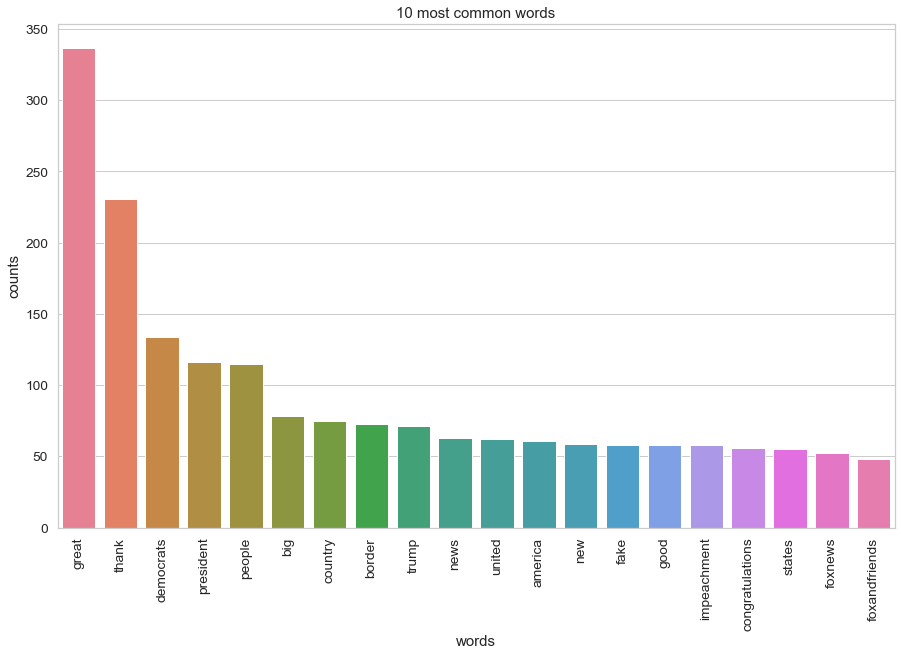

Topics found via LDA:

Topic #0:
great america make thank read support trump foxandfriends transcript israel

Topic #1:
thank great trump big impeachment total government want isis border

Topic #2:
great people country congratulations big election new job total president

Topic #3:
president great happy democrats thank birthday country money wheres whistleblower

Topic #4:
border great thank democrats security job good deal want big

Topic #5:
president people great democrats china years impeachment make deal united

Topic #6:
great market stock thank record country high big president new

Topic #7:
vote great border today wonderful democrats big southern country deal

Topic #8:
whistleblower schiff thank president corrupt mexico democrats good adam happy

Topic #9:
foxnews pm interviewed tonight enjoy people seanhannity report thank good

Topic #10:
great thank end people best forward congratulations meeting hard time

Topic #11:
great trump thank donald people wall going totally fox

C:\Users\rami.khalid\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8909/    [Ctrl-C to exit]


127.0.0.1 - - [17/Mar/2020 15:38:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 15:39:07] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 15:39:07] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 15:39:07] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2020 15:39:07] code 404, message Not Found
127.0.0.1 - - [17/Mar/2020 15:39:07] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
import pandas as pd
import os
import re
import nltk as sent_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import pyLDAvis.gensim
warnings.simplefilter("ignore", DeprecationWarning)
sns.set_style('whitegrid')
%time
%matplotlib inline



def stop_word_c(text):
    STOPWORDS = set(stopwords.words('english'))
    text =  ' '.join([word for word in text.split() if word not in STOPWORDS])
    return text

def stemma(text):
    stemmer= PorterStemmer()
    text=word_tokenize(text)
    for word in text:
        print(stemmer.stem(word))
    

def lemma(text):
    lemmatizer=WordNetLemmatizer()
    text=word_tokenize(text)
    for word in text:
        print(lemmatizer.lemmatize(word))
    
def to_lowercase(text):
    r=text.lower()
    return r

def del_emptyrows(t):
    t=t.dropna()


df=pd.read_csv('C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\trumptweets.csv',error_bad_lines=False,quoting=3)
del df['link']
del df['retweets']
del df['favorites']
del df['mentions']
del df['hashtags']
del df['geo;']
del df['id']


df['content'] = df['content'].map(lambda x: re.sub(r"[!”#$%&’""()*+,-./:;<=>?@[\]^_`…'{|}~“–\d+]", '', x))
df['content'] = df['content'].map(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
df['content'] = df['content'].map(lambda x :to_lowercase(x))
df['content'] = df['content'].map(lambda x :stop_word_c(x))




def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.savefig("C:\\Users\\rami.khalid\\Desktop\\image_plt.png")
    plt.show()
    
    
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df['content'])
plot_20_most_common_words(count_data, count_vectorizer)


def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
    for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 20
number_words = 10
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)
LDAvis_data_filepath = os.path.join('C:\\Users\\rami.khalid\\Desktop\\t'+str(number_topics))
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open("C:\\Users\\rami.khalid\\ldavis_prepared_10",'wb') as f:
        pickle.dump(LDAvis_prepared, f)
    with open("C:\\Users\\rami.khalid\\ldavis_prepared_10",'rb') as f:
        LDAvis_prepared = pickle.load(f)
        #pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')
        pyLDAvis.show(LDAvis_prepared)



In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rami.khalid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
#coding: utf-8
import sys
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt



def listToString(text):
    str1 = " " 
    return (str1.join(s)) 

def del_emptyrows(t):
    t=t.dropna()
    return t


def stop_word_c(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = []
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence.append(w)
    return filtered_sentence


    
def clean_text(text):
    res=re.sub(r"[!”#$%&’""()*+,-.\n/—:;<=>?@`…'^_{|}~“–\d+]","",str(text))
    return res
    


def traduction(text):
    blob = TextBlob(text)
    res_tra = blob.translate(from_lang ='ar' , to ='en')
    return res_tra

def detect_sentiment(text):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(text)
    print("sentiments is  {}".format(score))
    
def _calc_ratios(text):

    ratios = {}

    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens]

    for lang in stopwords.fileids():
        stopwords_set = set(stopwords.words(lang))
        words_set = set(words)
        common_words = words_set.intersection(stopwords_set)

        ratios[lang] = len(common_words)

    return ratios   


def _calc_probability(most, secode_most) :
    proba = (float(most) /(most + secode_most) * 100)
    return round(proba)    


def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 
    
        
def detect_language(text):
    ratios = _calc_ratios(text)
    most_rated_language = max(ratios, key=ratios.get)
    most_common_words = ratios[most_rated_language]
    del ratios[most_rated_language]
    second_most_rated_language = max(ratios, key=ratios.get)
    second_most_common_words = ratios[second_most_rated_language]
    print("there is %s%% chances for this text to be writen in %s" %(_calc_probability(most_common_words, second_most_common_words), most_rated_language))

    
def topic_searching(text):
    
    sport = ['Argentina','aerobics','arena','athletics','archer','arrow','axel','athlete','badminton','baseball','ball','basketball','bat','baton','bike','golf']
    science = ['biology','chemical','electricity','electricity','geology','genetics','geophysics','herpetology','laboratory','physics','physical science']
    economies = ['Average','Arbitrage','$','Autarky','Altruism','Assets','Agriculture','Assets','Amortisation','cash','consumer','competition','global','finance','invest','investment']
    computer_science =['algorithm','app','application','application','array','backup','bug','browser','CD','boot','buffer','computer','database','website','back-end','front-end']
    crime = ['crime','killer','abduction','arson','assassination','assault','bigamy','blackmail','bombing','corruption','crime','cybercrime','forgery','fraud']
    books = ['author','bibliophile','colophon','epilogue','epistolary','foreword','frontispiece','prologue','tome']
    food = ['acidic','fruity','healty','cereal','eggs','milk','soup','beans','chocolate','jam','mustard','grill','meat','water','dish','ingredients','fastfood','tasty']
    industry =['manufacture','fabricate','assemble','factory','produce','automation','union','plant','technology','industry','machinery','process','import','export']
    sociology = ['agential','catalyse','socialising','industrialise','sociology','functionalism','computationally','deviance','positivism','computational','functionalist','overarch']
    press_media =['Aerial','Advertisement','blog','blogger','Blogosphere','Broadcast','Editorial','Journalism','Mass media','Media bias','Newspaper']
    Health = ['specimen','diagnosis','calf','abdomen','prominence','navel','sprain','intense','prenatal','numb','supervise','patient']
    tourisme = ['accommodation','car rental','car park','car hire','city centre','guide','flight','hotel','hostel','ski resort','fly','resort']
    education = ['Attendance','Chancellor','Course','Dean','Degree','Department','Diploma','Director','University','Thesis','Teaching assistant']
    agriculture = ['climate','plant','agrarian','water','Weather','farm','farmer','crop','subsistence agriculture','commerical agriculture','agribusiness','grain','green revolution']
    
    
    
    r_all=[sport,science,economies,computer_science,crime,books,food,industry,sociology,press_media,Health,tourisme,education,agriculture]
    
    res1 = any(ele in text for ele in sport)
    if res1 == True:
        print("topic is sport")
    res2 = any(ele in text for ele in science)
    if res2 == True:
        print("topic is science")
    res3 = any(ele in text for ele in economies)
    if res3 == True:
        print("topic is economies")
    res4 = any(ele in text for ele in computer_science)
    if res4 == True:
        print("topic is computer_science")
    res5 = any(ele in text for ele in crime)
    if res5 == True:
        print("topic is crime")
    res6 = any(ele in text for ele in books)
    if res6 == True:
        print("topic is books")
    res7 = any(ele in text for ele in food)
    if res7 == True:
        print("topic food ")
    res8 = any(ele in text for ele in industry)    
    if res8 == True:
        print("topic is industry")
    res9 = any(ele in text for ele in sociology)    
    if res9 == True:
        print("topic is sociology")
    res10 = any(ele in text for ele in press_media)    
    if res10 == True:
        print("topic is press_media")
    res11 = any(ele in text for ele in Health)    
    if res11 == True:
        print("topic is health")
    res12 = any(ele in text for ele in tourisme)    
    if res12 == True:
        print("topic is tourisme")
    res13 = any(ele in text for ele in education)    
    if res13 == True:
        print("topic is education")
    res14 = any(ele in text for ele in agriculture)
    if res14 == True:
        print("topic is agriculture")
    res15 = any(ele not in text for ele in str(r_all))
    if res15 == True:
        print(" it's another topic")


        
        
df=pd.read_csv("C:\\Users\\rami.khalid\\Desktop\\data\\data_xl_csv\\trumptweets.csv",error_bad_lines=False,quoting=3)
df=del_emptyrows(df)
del df['link']
del df['retweets']
del df['favorites']
del df['mentions']
del df['hashtags']
del df['geo;']
del df['id']
del df['date']

#result1=clean_text(df['content'])
#result2=stop_word_c(result1)
#result3 = listToString(result2)
#print(result3)

df['content'] = df['content'].map(lambda x :topic_searching(x))
df['content']







topic is sport
 it's another topic
topic is sport
 it's another topic
topic is computer_science
 it's another topic
 it's another topic
topic is sport
 it's another topic
 it's another topic
 it's another topic
topic is industry
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
topic is computer_science
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic
 it's another topic


b'Skipping line 5: expected 9 fields, saw 13\nSkipping line 6: expected 9 fields, saw 10\nSkipping line 7: expected 9 fields, saw 12\nSkipping line 9: expected 9 fields, saw 13\nSkipping line 11: expected 9 fields, saw 10\nSkipping line 12: expected 9 fields, saw 12\nSkipping line 13: expected 9 fields, saw 11\nSkipping line 14: expected 9 fields, saw 12\nSkipping line 15: expected 9 fields, saw 11\nSkipping line 16: expected 9 fields, saw 10\nSkipping line 17: expected 9 fields, saw 15\nSkipping line 18: expected 9 fields, saw 10\nSkipping line 23: expected 9 fields, saw 12\nSkipping line 24: expected 9 fields, saw 10\nSkipping line 25: expected 9 fields, saw 12\nSkipping line 27: expected 9 fields, saw 11\nSkipping line 29: expected 9 fields, saw 10\nSkipping line 30: expected 9 fields, saw 12\nSkipping line 31: expected 9 fields, saw 11\nSkipping line 32: expected 9 fields, saw 13\nSkipping line 33: expected 9 fields, saw 13\nSkipping line 34: expected 9 fields, saw 11\nSkipping lin

48      None
77      None
88      None
141     None
197     None
273     None
490     None
507     None
509     None
596     None
671     None
776     None
818     None
891     None
946     None
1045    None
1088    None
1099    None
1495    None
1512    None
1605    None
1775    None
1799    None
1801    None
Name: content, dtype: object

In [12]:
!pip install vaderSentiment

In [14]:
import gensim
from gensim import corpora
from pprint import pprint
import re
import sys
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize



def clean_text(text):
    res=re.sub(r"[!”#$%&’""()*+,-.\n/—:;<=>?@`…'^_{|}~“–\d+]","",str(text))
    return res


def stop_word_c(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            return filtered_sentence
        
        

text = ["""In computer science, artificial intelligence (AI),
             sometimes called machine intelligence, is intelligence
             demonstrated by machines, in contrast to the natural intelligence
             displayed by humans and animals. Computer science defines
             AI research as the study of intelligent agents: any device that
             perceives its environment and takes actions that maximize its chance
             of successfully achieving its goals."""]

tokens = [[token for token in sentence.split()] for sentence in text]
gensim_dictionary = corpora.Dictionary(tokens)

print("The dictionary has: " +str(len(gensim_dictionary)) + " tokens")

for k, v in gensim_dictionary.token2id.items():
    print(k,v)
    
    

print(gensim_dictionary.token2id["study"]) 

The dictionary has: 46 tokens
(AI), 0
AI 1
Computer 2
In 3
achieving 4
actions 5
agents: 6
and 7
animals. 8
any 9
artificial 10
as 11
by 12
called 13
chance 14
computer 15
contrast 16
defines 17
demonstrated 18
device 19
displayed 20
environment 21
goals. 22
humans 23
in 24
intelligence 25
intelligence, 26
intelligent 27
is 28
its 29
machine 30
machines, 31
maximize 32
natural 33
of 34
perceives 35
research 36
science 37
science, 38
sometimes 39
study 40
successfully 41
takes 42
that 43
the 44
to 45
40


In [17]:
import gensim
from gensim import corpora
from pprint import pprint
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize





def clean_text(text):
    res=re.sub(r"[!”#$%&’""()*+,-.\n/—:;<=>?@`…'^_{|}~“–\d+]","",str(text))
    return res


def stop_word_c(text):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in text if not w in stop_words] 
    filtered_sentence = []
    for w in text:
        if w not in stop_words:
            filtered_sentence.append(w)
            return filtered_sentence
        
        
        
        
# How to create a dictionary from a list of sentences?
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["The intersection graph of paths in trees",
               "Graph minors IV Widths of trees and well quasi ordering",
               "Graph minors A survey"]



#documents = stop_word_c(documents)
#documents_2 = stop_word_c(documents_2)
# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]
text2 = [[text for text in doc.split() ]for doc in documents_2]

dictionary = corpora.Dictionary(texts)

# Create dictionary
dictionary.add_documents(text2)
results=dictionary.token2id
print(results)
#dictionary2 = corpora.Dictionary(text2)
# Get information about the dictionary
#print(dictionary2.token2id)

         
my_docs=[" hi im khalid rami and im from morocco i hope your doing good guys best wishe ."]
tokenized_list = [gensim.utils.simple_preprocess(doc) for doc in my_docs]
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
#pprint(mycorpus)
word_counts = [[(mydict[id], count) for id, count in line] for line in mycorpus]
#pprint(word_counts)
mydict.save('mydict.dict')
corpora.MmCorpus.serialize('bow_corpus.mm',mycorpus)
loaded_dict = corpora.Dictionary.load('mydict.dict')
corpus = corpora.MmCorpus('bow_corpus.mm')
for line in corpus:
    print(line)
    
    
   

{'Saudis': 0, 'The': 1, 'a': 2, 'acknowledge': 3, 'are': 4, 'preparing': 5, 'report': 6, 'that': 7, 'will': 8, 'Jamal': 9, "Khashoggi's": 10, 'Saudi': 11, 'an': 12, 'death': 13, 'journalist': 14, 'of': 15, 'result': 16, 'the': 17, 'was': 18, 'intended': 19, 'interrogation': 20, 'lead': 21, 'one': 22, 'to': 23, 'went': 24, 'wrong,': 25, 'Turkey,': 26, 'abduction': 27, 'according': 28, 'from': 29, 'his': 30, 'sources.': 31, 'two': 32, 'graph': 33, 'in': 34, 'intersection': 35, 'paths': 36, 'trees': 37, 'Graph': 38, 'IV': 39, 'Widths': 40, 'and': 41, 'minors': 42, 'ordering': 43, 'quasi': 44, 'well': 45, 'A': 46, 'survey': 47}
[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 2.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0)]


In [16]:
from gensim import models
import numpy as np

documents = ["hi all my name is khalid rami and im from morocco i hope you doing well,wish you all the best"]

mydict = corpora.Dictionary([gensim.utils.simple_preprocess(line) for line in documents])
corpus = [mydict.doc2bow(gensim.utils.simple_preprocess(line)) for line in documents]

for doc in corpus:
    print([[mydict[id], freq] for id, freq in doc])

tfidf = models.TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weight4
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])

[['all', 2], ['and', 1], ['best', 1], ['doing', 1], ['from', 1], ['hi', 1], ['hope', 1], ['im', 1], ['is', 1], ['khalid', 1], ['morocco', 1], ['my', 1], ['name', 1], ['rami', 1], ['the', 1], ['well', 1], ['wish', 1], ['you', 2]]
[['all', 0.41], ['and', 0.2], ['best', 0.2], ['doing', 0.2], ['from', 0.2], ['hi', 0.2], ['hope', 0.2], ['im', 0.2], ['is', 0.2], ['khalid', 0.2], ['morocco', 0.2], ['my', 0.2], ['name', 0.2], ['rami', 0.2], ['the', 0.2], ['well', 0.2], ['wish', 0.2], ['you', 0.41]]
